In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('preprocessed_weather_data.csv')

In [4]:
print(df.columns)

Index(['Summary', 'Daily Summary', 'Humidity', 'Apparent Temperature (C)',
       'Temperature (C)', 'Visibility (km)', 'Pressure (millibars)',
       'Wind Speed (km/h)', 'Formatted Date', 'Wind Bearing (degrees)',
       'Temperature (C)_standardized'],
      dtype='object')


In [5]:
target = df['Temperature (C)']

In [6]:
train_size = int(len(target) * 0.8)  # 80% for training, 20% for testing
train, test = target[:train_size], target[train_size:]

In [7]:
model_train = ARIMA(train, order=(2, 0, 2))  # Use the same order for consistency
model_train_fit = model_train.fit()

In [8]:
train_forecast = model_train_fit.fittedvalues

In [9]:
test_forecast = model_train_fit.forecast(steps=len(test))

In [10]:
start_date = pd.to_datetime('2025-07-05')
end_date = pd.to_datetime('2025-12-31')

In [11]:
num_days = (end_date - start_date).days

In [12]:
future_forecast = model_train_fit.forecast(steps=num_days)

In [13]:
forecast_index = pd.date_range(start=start_date, periods=num_days + 1, freq='D')[1:]

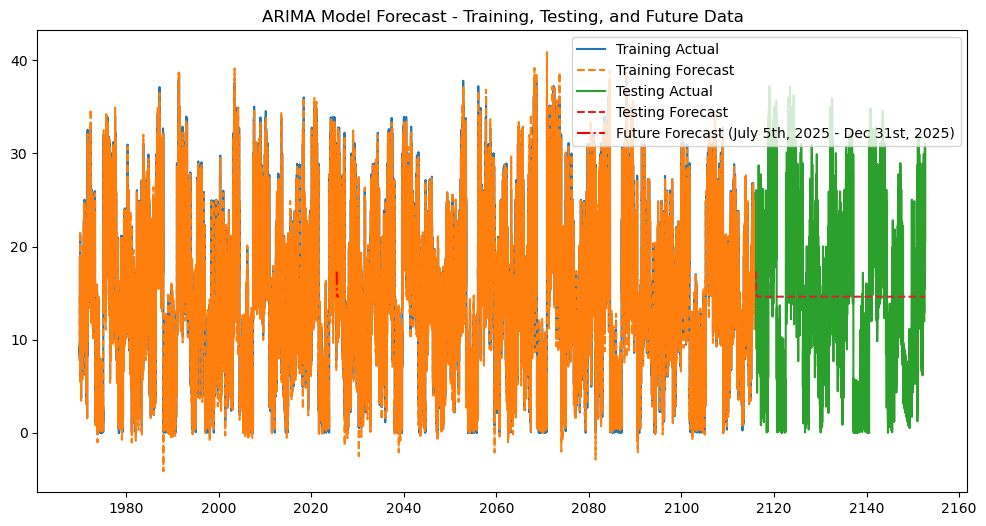

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Actual')
plt.plot(train.index, train_forecast, label='Training Forecast', linestyle='--')
plt.plot(test.index, test, label='Testing Actual')
plt.plot(test.index, test_forecast, label='Testing Forecast', linestyle='--')
plt.plot(forecast_index, future_forecast, label='Future Forecast (July 5th, 2025 - Dec 31st, 2025)', linestyle='-.', color='red')
plt.title("ARIMA Model Forecast - Training, Testing, and Future Data")
plt.legend()
plt.show()

In [15]:
# Training data evaluation
train_mae = mean_absolute_error(train, train_forecast)
train_mse = mean_squared_error(train, train_forecast)
train_rmse = np.sqrt(train_mse)
train_mape = mean_absolute_percentage_error(train, train_forecast)
 
print(f"Training Data - MAE: {train_mae}, MSE: {train_mse}, RMSE: {train_rmse}, MAPE: {train_mape}")
 
# Testing data evaluation
test_mae = mean_absolute_error(test, test_forecast)
test_mse = mean_squared_error(test, test_forecast)
test_rmse = np.sqrt(test_mse)
test_mape = mean_absolute_percentage_error(test, test_forecast)
 
print(f"Testing Data - MAE: {test_mae}, MSE: {test_mse}, RMSE: {test_rmse}, MAPE: {test_mape}")
# Step 8: Save the future forecast to a CSV file
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted Temperature (C)': future_forecast
})
 
# Save to CSV
forecast_df.to_csv('forecast_july5_to_dec31_2025.csv', index=False)
print("Forecast saved to 'forecast_july5_to_dec31_2025.csv'")

Training Data - MAE: 1.1105274245768966, MSE: 3.256231715941229, RMSE: 1.8045031770382753, MAPE: 0.3724755903789502
Testing Data - MAE: 7.083439403877094, MSE: 71.32890199512455, RMSE: 8.445643965685775, MAPE: 3.5259647038504567
Forecast saved to 'forecast_july5_to_dec31_2025.csv'
